In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [34]:
# First we load the preprocessed data
df = pd.read_csv('../data/preprocessing/clean_data_card_transdata.csv')
print("The data has been uploaded successfully!")


The data has been uploaded successfully!


In [35]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.88,0.31,1.95,1.0,1.0,0.0,0.0,0.0
1,10.83,0.18,1.29,1.0,0.0,0.0,0.0,0.0
2,5.09,0.81,0.43,1.0,0.0,0.0,1.0,0.0
3,2.25,5.60,0.36,1.0,1.0,0.0,1.0,0.0
4,44.19,0.57,2.22,1.0,1.0,0.0,1.0,0.0


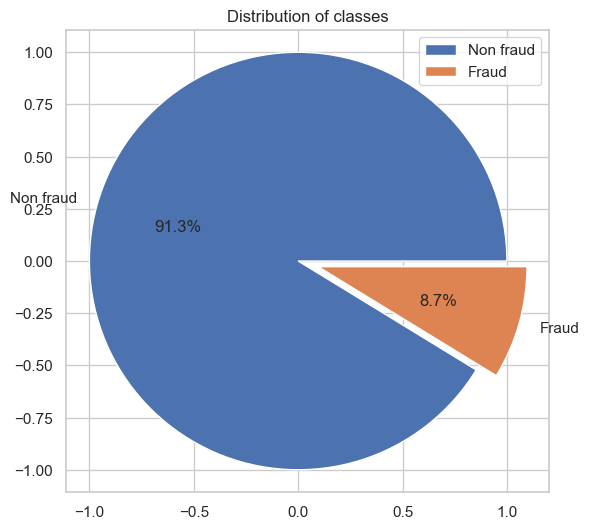

In [57]:
# Distribution of target value Fraud
plt.figure(figsize=(10,6))
plt.pie(df['fraud'].value_counts(), 
        labels=['Non fraud', 'Fraud'], 
        frame= True,
        autopct= '%1.1f%%',
        explode= [0, 0.1])
plt.title("Distribution of classes")
plt.legend()
plt.show()


### Note:
<p> As we can see, the distribution of the classes — *fraud* vs *non-fraud* — is highly imbalanced. This imbalance can negatively affect the performance of machine-learning models, as they tend to be biased toward the majority class (non-fraudulent transactions) and may fail to correctly identify fraudulent ones. 

To address this issue, we need to apply resampling techniques such as **oversampling**, **undersampling**, or **SMOTE** in order to balance the dataset and ensure that both classes are equally represented during training.</p>

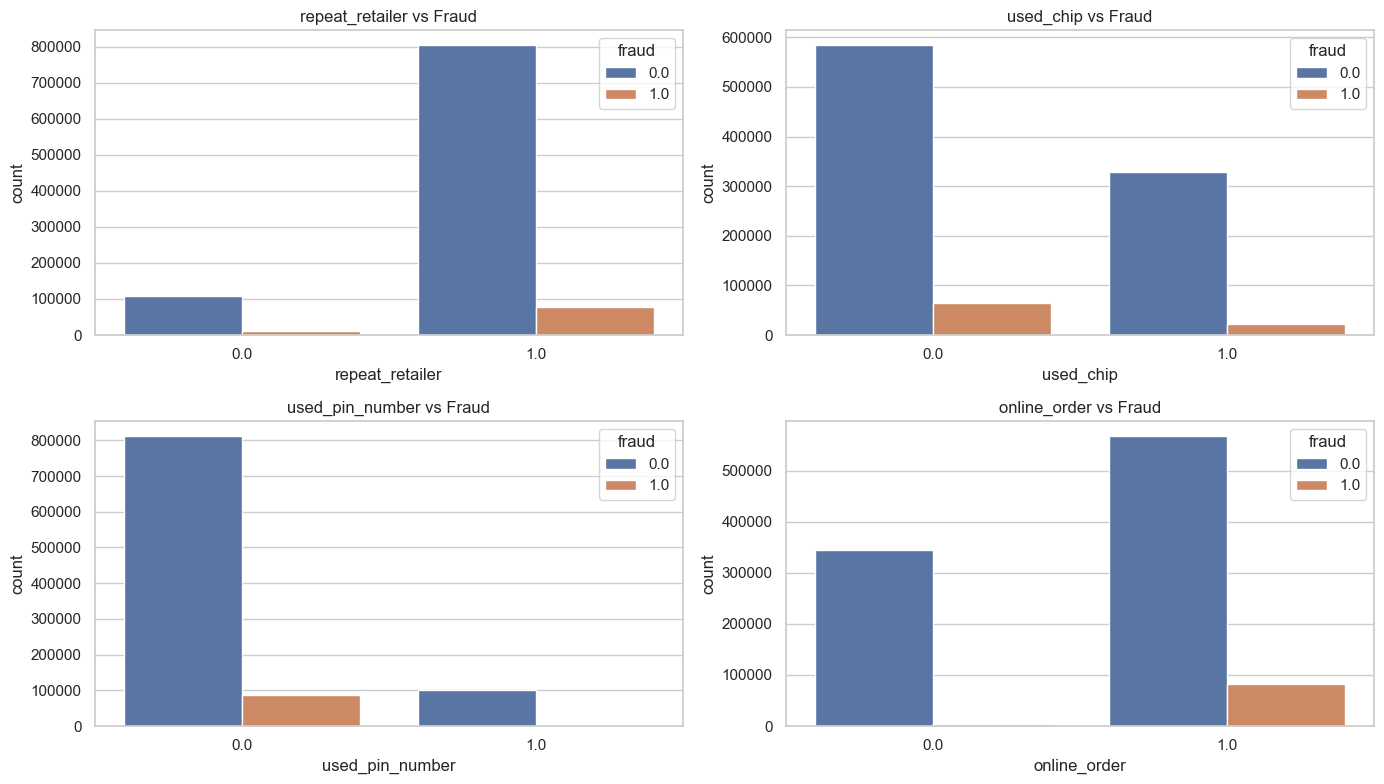

In [37]:
binary_cols = [
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

plt.figure(figsize=(14,8))
for i, col in enumerate(binary_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue="fraud")
    plt.title(f"{col} vs Fraud")

plt.tight_layout()
plt.show()


<p>As we can see in the first graph, we have a high probability that the transaction that happened from the same retailer is highly not a fraud</p>

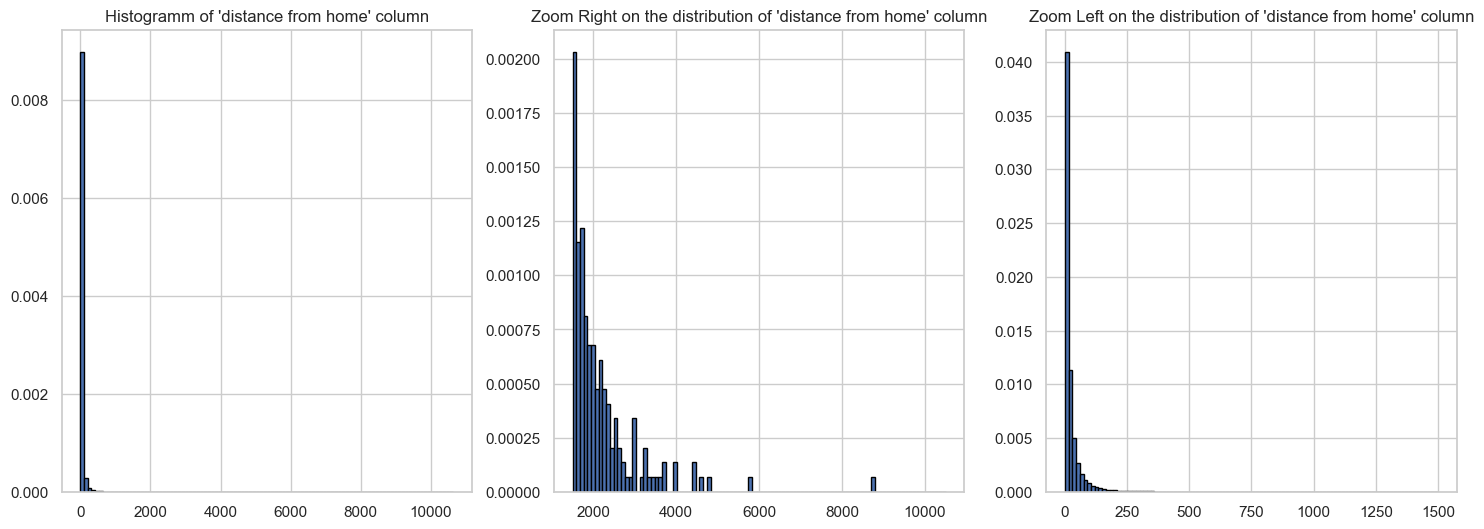

26.628788170000007
9.97
0    1.12
Name: distance_from_home, dtype: float64


In [38]:
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.hist(data= df, x= 'distance_from_home', bins=100, density= True, edgecolor='black')
plt.title("Histogramm of \'distance from home\' column")

plt.subplot(132)
plt.hist(data= df, x= 'distance_from_home', bins=100, density= True, edgecolor='black', range=(1500,10500))
plt.title("Zoom Right on the distribution of \'distance from home\' column")

plt.subplot(133)
plt.hist(data= df, x= 'distance_from_home', bins=100, density= True, edgecolor='black', range=(0,1500))
plt.title("Zoom Left on the distribution of \'distance from home\' column")
plt.show()

print(df['distance_from_home'].mean())
print(df['distance_from_home'].median())
print(df['distance_from_home'].mode())


<p>The distribution of the <em>distance_from_home</em> variable is highly right-skewed, with most observations concentrated near low values and a long tail extending toward large distances. As a result of this asymmetry, the mean is greater than the median, which in turn is greater than the mode.</p>

In [39]:
# we use log transformation to minimize skewness
df['log_distance_from_home'] = np.log1p(df['distance_from_home'])


2.4896930577103276
2.395164274287139
0    0.751416
Name: log_distance_from_home, dtype: float64


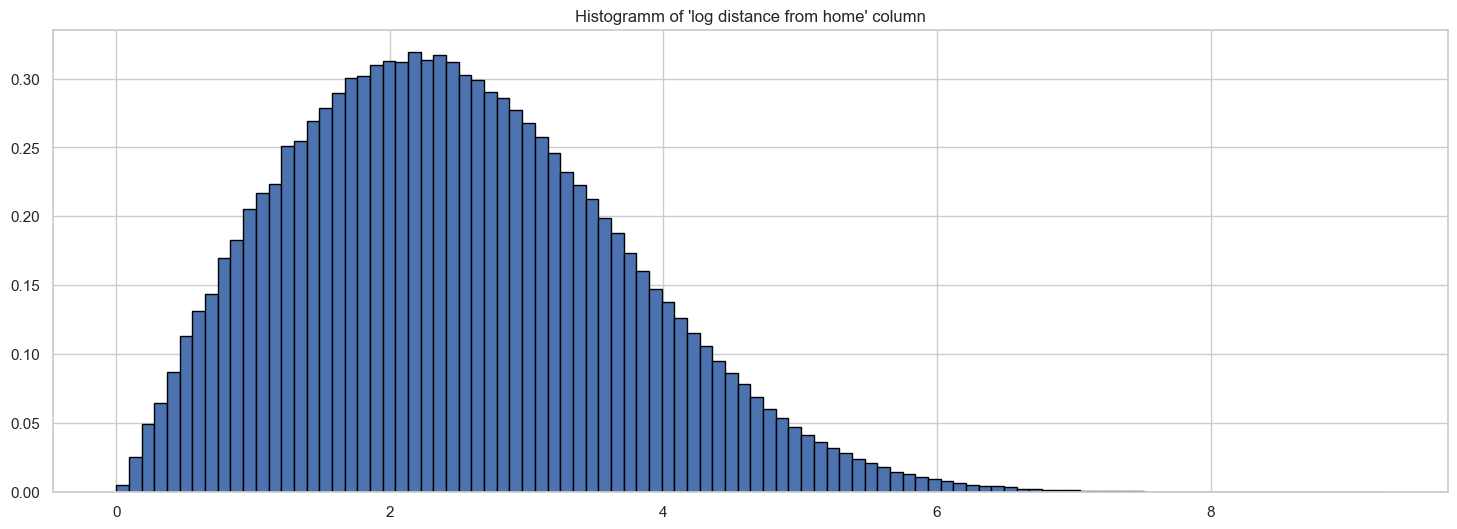

In [40]:
plt.figure(figsize=(18, 6))

plt.hist(data= df, x= 'log_distance_from_home', bins=100, density= True, edgecolor='black')
plt.title("Histogramm of \'log distance from home\' column")
print(df['log_distance_from_home'].mean())
print(df['log_distance_from_home'].median())
print(df['log_distance_from_home'].mode())


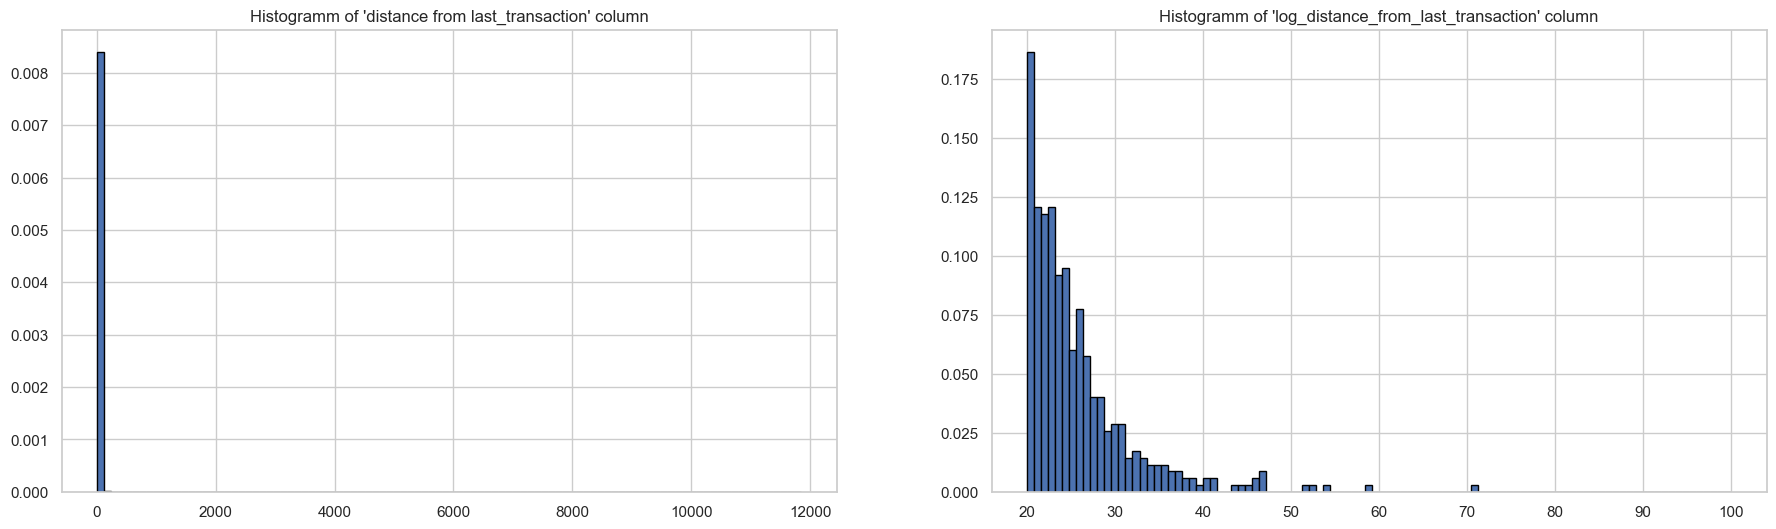

In [41]:
# Same thng for 'distance_from_last_transaction
df['log_distance_from_last_transaction'] = np.sqrt(df['distance_from_last_transaction'])

plt.figure(figsize=(22, 6))

plt.subplot(121)
plt.hist(data= df, x= 'distance_from_last_transaction', bins=100, density= True, edgecolor='black')
plt.title("Histogramm of \'distance from last_transaction\' column")

plt.subplot(122)
plt.hist(data= df, x= 'log_distance_from_last_transaction', bins=100, density= True, edgecolor='black', range=(20,100))
plt.title("Histogramm of \'log_distance_from_last_transaction\' column")

plt.show()

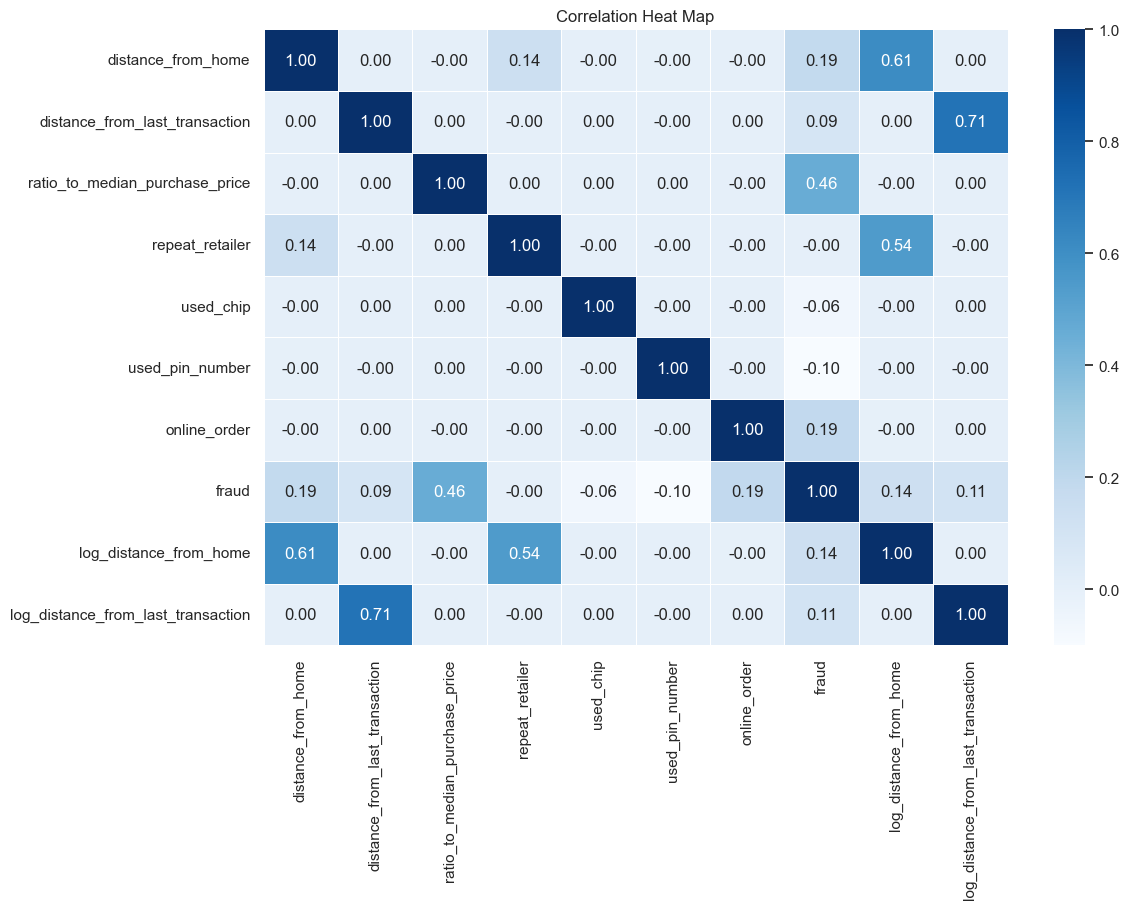

In [42]:
# Correlation heat map
corr = df.corr(numeric_only= True)

plt.figure(figsize=(12,8))
sns.heatmap(corr,
            annot= True,
            cmap= 'Blues',
            linewidths= 0.5,
            fmt=".2f")
plt.title('Correlation Heat Map')
plt.show()

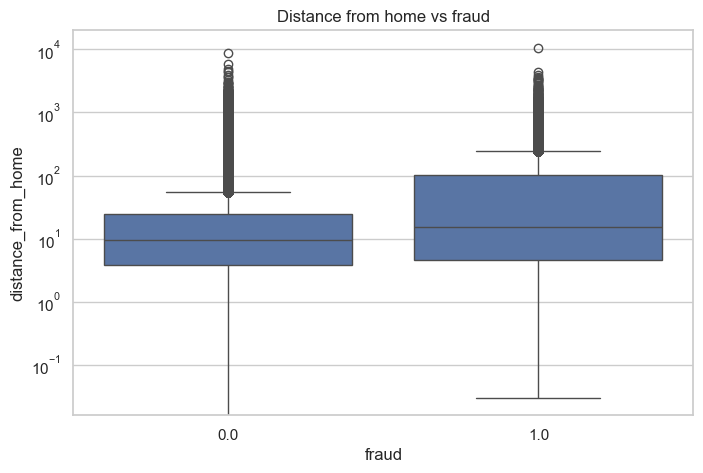

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='fraud', y='distance_from_home')
plt.yscale('log')  
plt.title('Distance from home vs fraud')
plt.show()


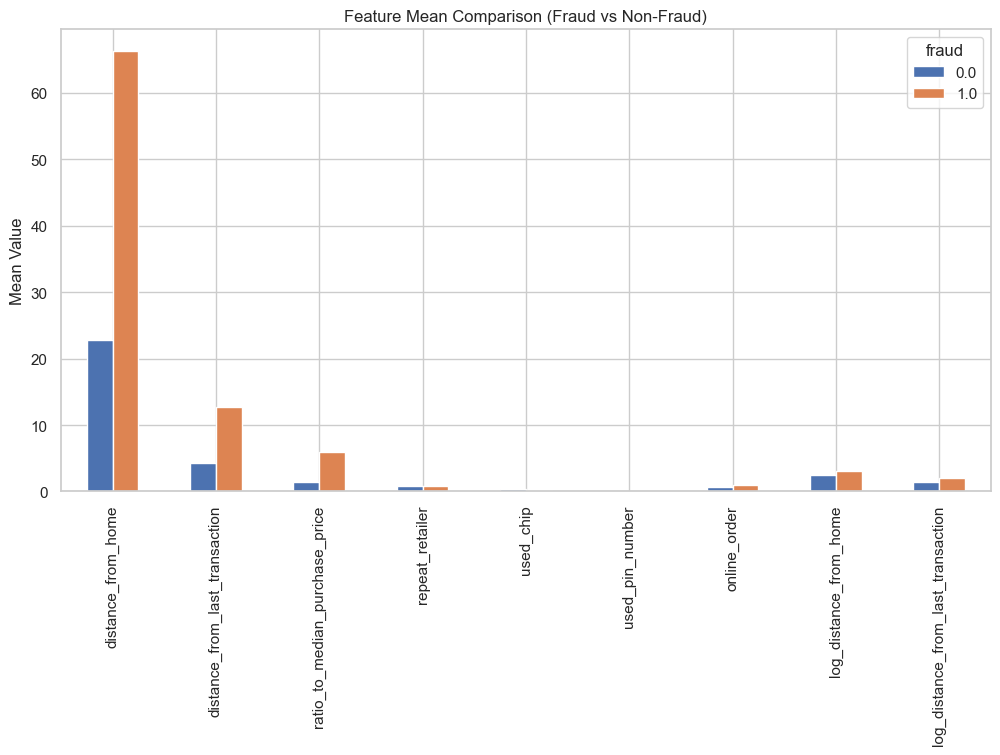

In [44]:
fraud_mean = df.groupby("fraud").mean().T

fraud_mean.plot(
    kind="bar",
    figsize=(12,6)
)

plt.title("Feature Mean Comparison (Fraud vs Non-Fraud)")
plt.ylabel("Mean Value")
plt.show()



<h1><center>END